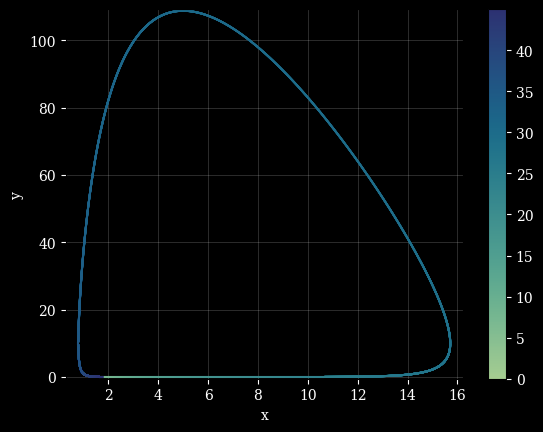

In [6]:
from numpy import *
import matplotlib.pyplot as plt
from ForwardEuler import ForwardEuler1D, ForwardEulernD
import matplotlib as mpl
import seaborn as sns

from plot_util import *

def dy(y, t):
    xv = y[0]
    yv = y[1]
    return array([0.1 * xv * (1 - 0.1*yv), -0.75 * yv * (1 - 0.2*xv)])

g = 9.8
length = 1.0

C = 4.5 * 1e-6
L = 0.001
R = 10
delta = 1
omega0 = 6

def pendulum(y, t):
    y1 = y[0]
    y2 = y[1]
    return array([y2, -g/length * sin(y1)])

def oscillator(y, t):
    x1 = y[0]
    x2 = y[1]
    return array([-2*delta * x1 - omega0**2 * x2 + u(t), x1])

def u(t):
    return 5*heaviside(t, 0.0) - 4*heaviside(t-0.1, 0.0)

t0 = 0
tmax = 45
dt = 0.001
N = int((tmax - t0) / dt)
y0 = array([1.0, 1])


fwe = ForwardEulernD(dy, y0, t0, dt)
y, t = fwe.run(N)

cmap = sns.color_palette('crest', as_cmap = True)
cmap2 = sns.color_palette('viridis', as_cmap=True)

def time2crest(x):
    return cmap(x / tmax)

def time2viridis(x):
    return cmap2(x / tmax)


def line_segments(xvals, yvals):
    data = column_stack((xvals, yvals))
    points = array([data[:,0], data[:,1]]).T.reshape(-1, 1, 2)
    return concatenate([points[:-1], points[1:]], axis=1)

segments = line_segments(y[:,0], y[:,1])

mpl_setscheme()
fig, ax = get_figure()

def set_limits(axis, data, offset=0.5):
    axis.set_xlim(min(data[:,0]) - offset, max(data[:,0]) + offset)
    axis.set_ylim(min(data[:,1]) - offset, max(data[:,1]) + offset)

lc = mpl.collections.LineCollection(segments, linewidths=1.5)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=t0, vmax=t[-1]))
lc.set_colors(time2crest(t))
lc.set_capstyle('round')
set_limits(ax, y)
fig.colorbar(sm, ax=ax)
ax.add_collection(lc)
plt.show()

